In [ ]:
import pandas as pd

order = pd.read_csv(r"C:\Users\Yasvanth.Pamidi\OneDrive - ENCORA\Desktop\DataMap\order.csv")
customer = pd.read_csv(r"C:\Users\Yasvanth.Pamidi\OneDrive - ENCORA\Desktop\DataMap\customer.csv")

In [2]:
order_columns = order.columns.tolist()
customer_columns = customer.columns.tolist()

In [3]:
!pip install -U scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

columns_vocabulary = order_columns + customer_columns

vectorizer = TfidfVectorizer()

Tfidf_matrix = vectorizer.fit_transform(columns_vocabulary)



In [5]:
print ("Tfidf_matrix.shape: ", Tfidf_matrix.shape)
print ( Tfidf_matrix.toarray() )

print (Tfidf_matrix)

print(vectorizer.get_feature_names_out())


Tfidf_matrix.shape:  (18, 11)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18 stored elements and shape (18, 11)>
  Coords	Values
  (0, 9)	1.0
  (1, 4)	1.0
  (2, 2)	1.0
  (3, 7)	1.0
  (4, 6)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 8)	1.0
  (8, 3)	1.0
  (9, 4)	1.0
  (10, 2)	1.0
  (11, 7)	1.0
  (12, 10)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (

In [6]:
order_file = Tfidf_matrix[:len(order_columns)]
customer_file = Tfidf_matrix[len(order_columns):]

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(order_file, customer_file)

print("Cosine Similarity Matrix:")
print(similarity_matrix)


Cosine Similarity Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


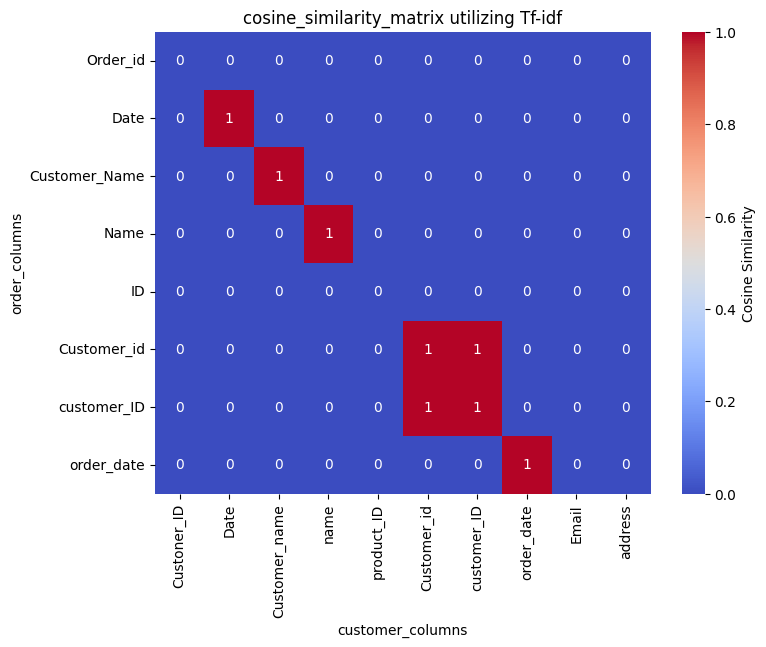

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot = True,xticklabels = customer_columns, yticklabels = order_columns, cmap='coolwarm', cbar_kws={'label': 'Cosine Similarity'})
plt.title('cosine_similarity_matrix utilizing Tf-idf')
plt.xlabel('customer_columns')
plt.ylabel('order_columns')
plt.show()